## Step 1: Importing Necessary Libraries

In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Extra
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
df = pd.read_csv("Leads.csv")

## Step 2: Inspecting the Dataframe

In [3]:
df.shape

(9240, 37)

In [4]:
df.size

341880

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Here, we can see the presence of few categorical values for which we have to create dummy variables. Also, presence of null values can be observed thus, we have to treat them accordingly in further steps

In [8]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

### No duplicate values exist in 'Prospect ID' and 'Lead Number'

# Exploratory Data Analysis

## Missing Value Check

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
cols_with_select_value = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


### As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

## 3.2 Dropping Columns with Missing Values >=35%

In [14]:
#Drop all the columns with more than 35% missing values
cols= df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 35):
         df.drop(i, 1, inplace = True)

In [15]:
#checking percentage of null values in each column after dropping columns with more than 35% missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Categorical Attributes Analysis:

In [16]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

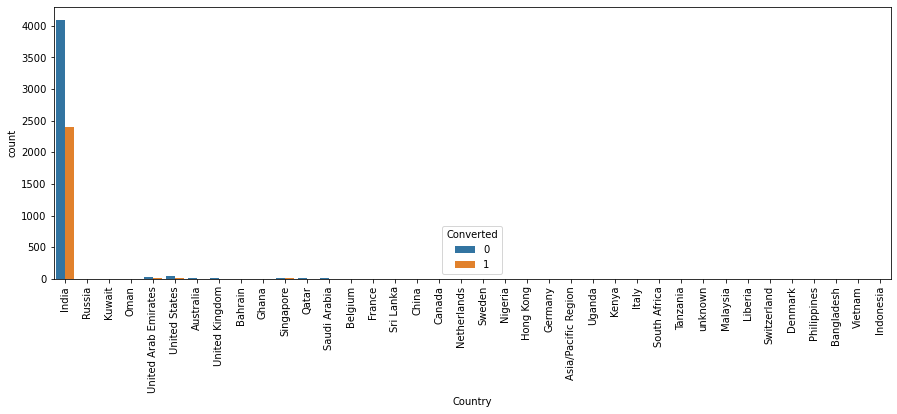

In [17]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

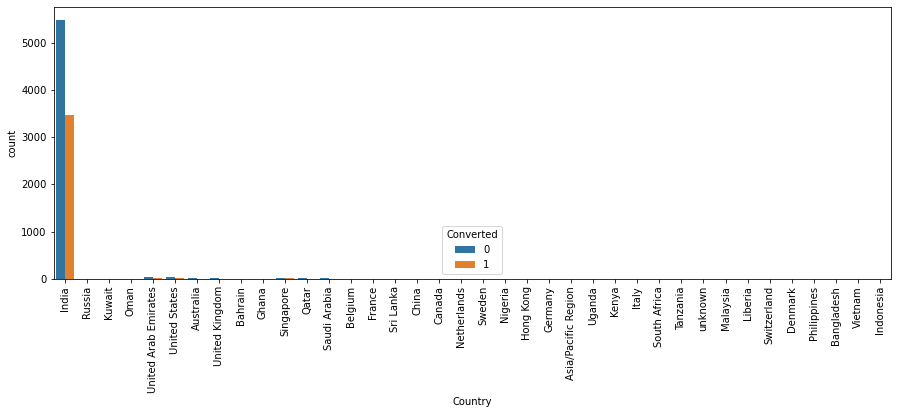

In [19]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [20]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [21]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
import pandas as pd

# Assuming the dataset is stored in a variable called 'df' and the column name is 'City'
df['City'] = df['City'].fillna('Select')
df['City'] = df['City'].replace('Select','Mumbai')

In [23]:

df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

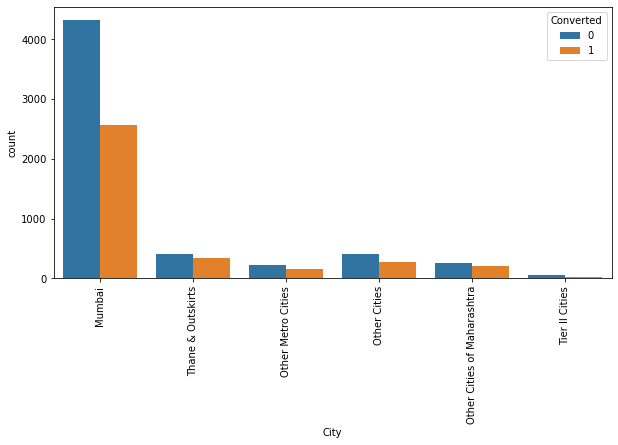

In [24]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
import pandas as pd

# Assuming the DataFrame is named 'leads' and the column name is 'City'
df['Specialization'] = df['Specialization'].fillna('Select')


In [27]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace('Select', 'Not Specified')

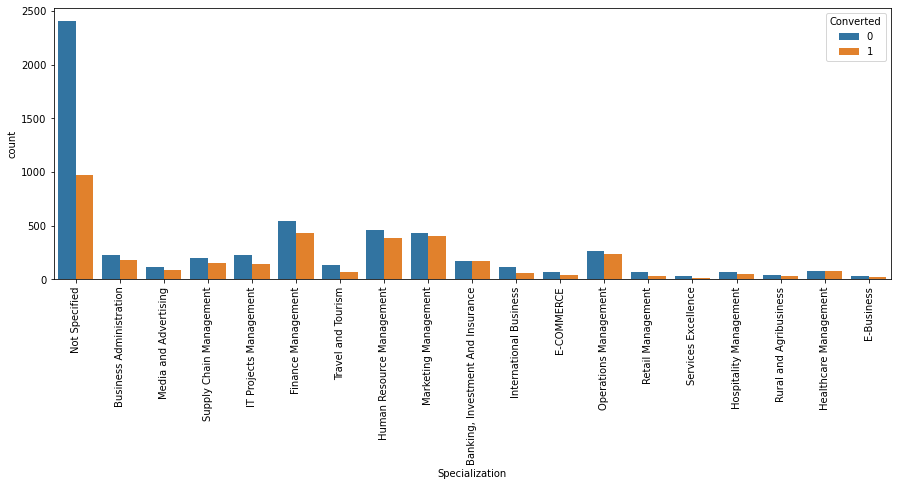

In [28]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [29]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

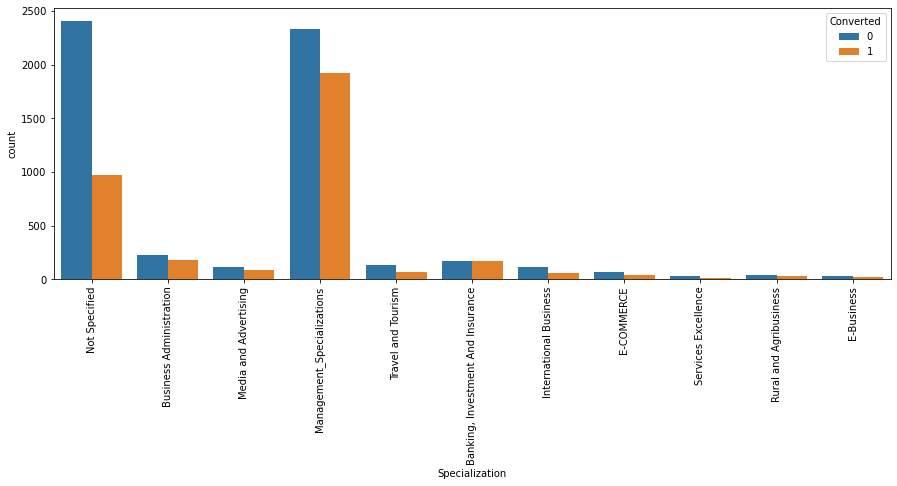

In [30]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
#What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

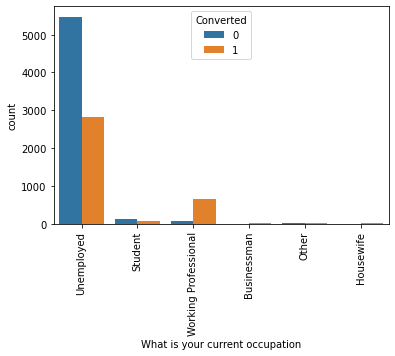

In [34]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* Working Professionals going for the course have high chances of joining it.
* Unemployed leads are the most in terms of Absolute numbers.

In [35]:
#checking value counts

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

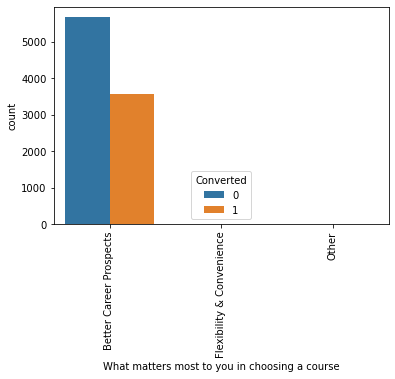

In [37]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [38]:
#checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [40]:
#checking value counts of Tag variable
df['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [41]:
df['Lead Profile'] = df['Lead Profile'].fillna('Select')


In [42]:
df['Lead Profile'].value_counts(dropna=False)

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [43]:
df['Lead Profile'] = df['Lead Profile'].replace('Select','Potential Lead')

In [44]:
df['Lead Profile'].value_counts(dropna=False)

Potential Lead                 8468
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

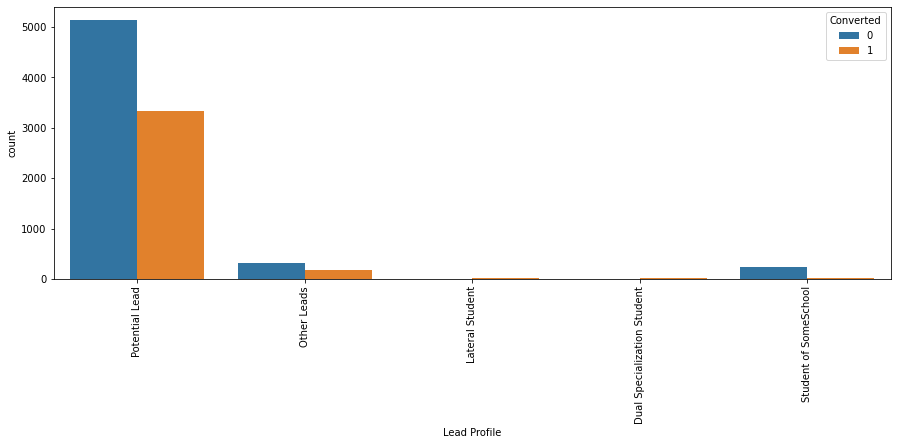

In [45]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Profile'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [47]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna('Select')

In [48]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select','Online Search')

In [49]:
df['How did you hear about X Education'].value_counts(dropna=False)

Online Search            8058
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

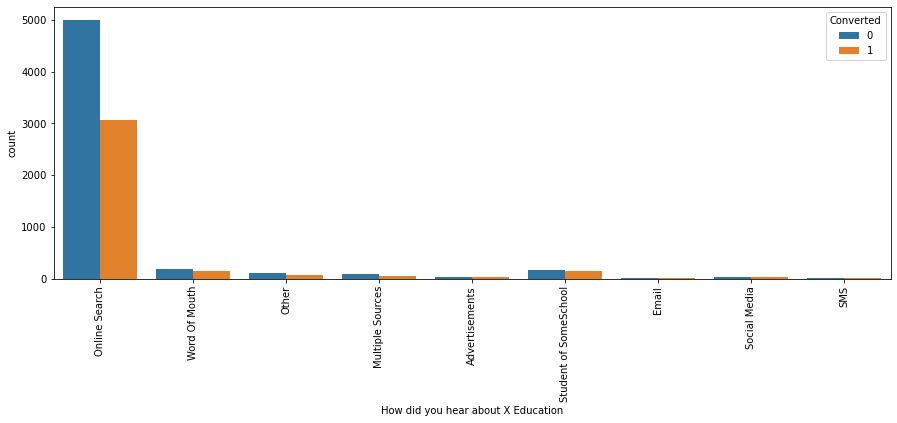

In [50]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['How did you hear about X Education'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [51]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False), 2)


TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Lead Profile                                     0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Search                                           0.00
Newspaper Article                                0.00
Magazine                    

In [52]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [53]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False), 2)


Lead Origin                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Source                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
How did you hear about X Education            

Removing Unwanted Columns

In [54]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

Handling columns with only one unique value

In [55]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,...,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,4,21,2,2,17,38,11,9,6,3,...,2,2,1,1,1,5,6,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,India,Management_Specializations,Online Search,Unemployed,Better Career Prospects,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
freq,4885,2868,8358,9072,3432,8787,4197,7894,8159,9072,...,9070,9067,9074,9074,9074,8311,6752,9074,6186,3267


NOTE: Following columns have only one unique value:

* 'I agree to pay the amount through cheque',
* 'Get updates on DM Content',
* 'Update me on Supply Chain Content',
* 'Receive More Updates About Our Courses',
* 'Magazine'

These columns are of no use as they have only one category of response from customer and can be dropped:

In [56]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df.shape)
df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9074, 29)
After Dropping Columns (9074, 24)


In [57]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Lead Profile                                     0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
How did you hear about X Education               0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                   

In [58]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique().sort_values(ascending= False)

Total Time Spent on Website                      1717
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Lead Source                                        21
Last Activity                                      17
Last Notable Activity                              16
Specialization                                     11
How did you hear about X Education                  9
City                                                6
What is your current occupation                     6
Lead Profile                                        5
Lead Origin                                         4
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                                         2
Search                                              2
Newspaper Article                                   2
X Education Forums          

# Dropping columns of no use for modeling

NOTE: Columns such as:

* 'Last Notable Activity'
* 'City'
* 'Country'
* 'How did you hear about X Education'
* 'Lead Profile'
* 'Converted'
* 'What matters most to you in choosing a course' 

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [59]:
# Dropping Columns
print("Before Dropping Columns",df.shape)
df.drop(['City','Country','Lead Profile','How did you hear about X Education','Last Notable Activity','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9074, 24)
After Dropping Columns (9074, 18)


## Checking & Dropping Category Columns that are Skewed

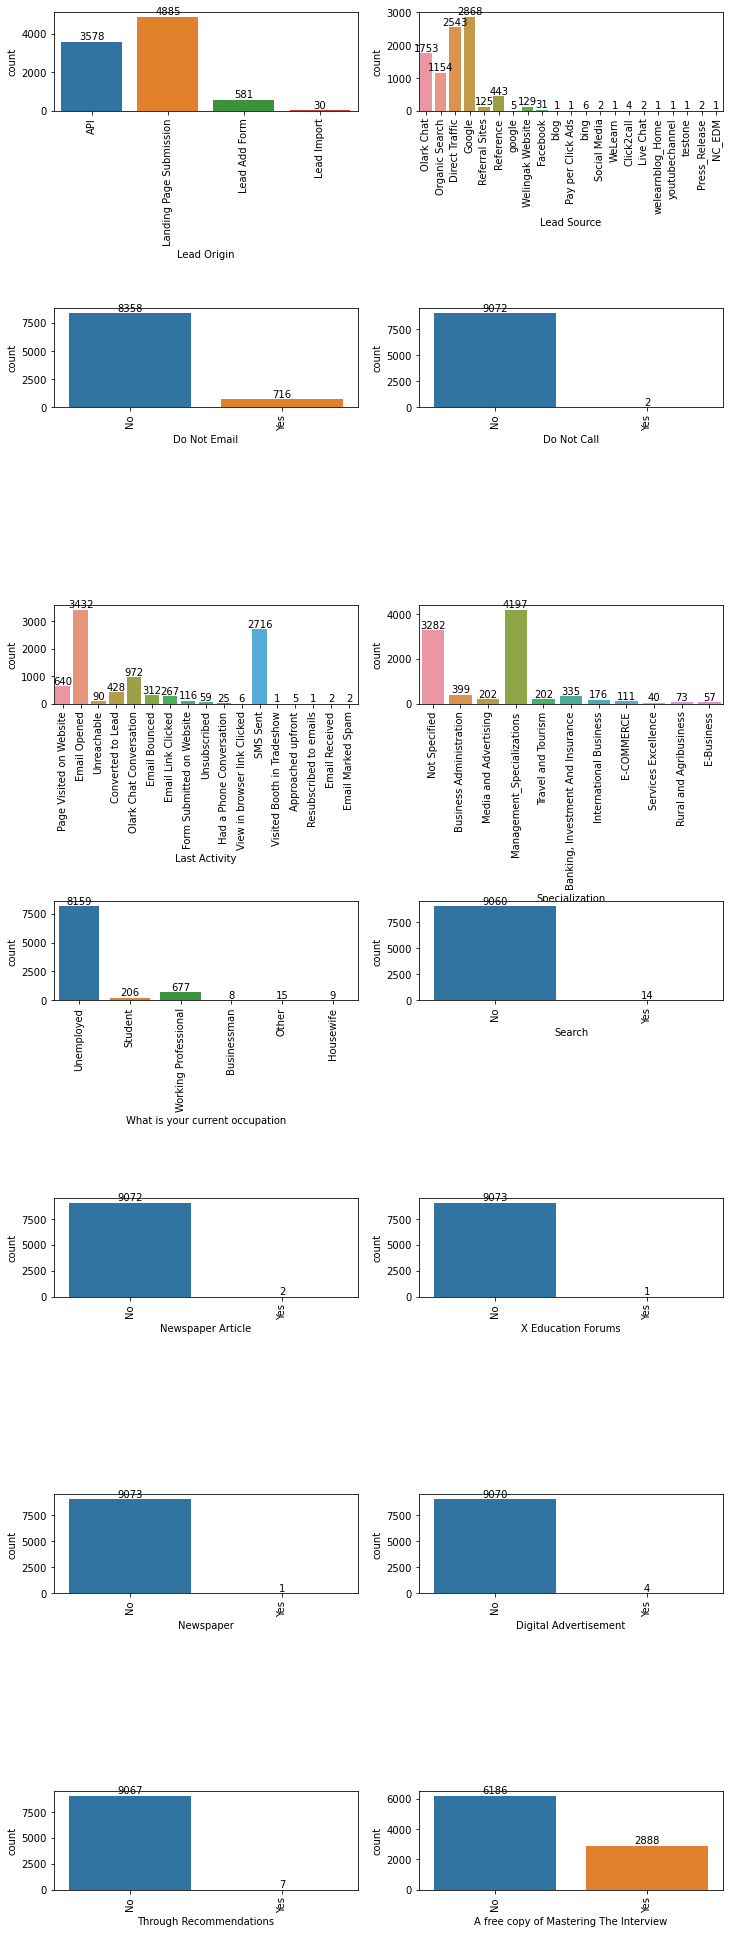

In [60]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

NOTE: Following columns have data which is highly skewed :

* 'Do Not Call',
* 'Search',
* 'Newspaper Article',
* 'X Education Forums',
* 'Newspaper',
* 'Digital Advertisement',
* 'Through Recommendations'.

Hence these columns will be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [61]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df.shape)
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Last Activity','Specialization' ,'A free copy of Mastering The Interview'],axis=1,inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (9074, 18)
After Drop:  (9074, 8)


In [62]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False), 2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
dtype: float64

## Numerical Attributes Analysis:

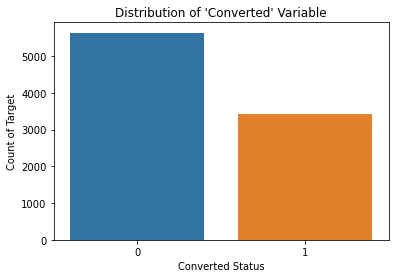

In [63]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [64]:
# Finding out conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

Currently, lead Conversion rate is 37.85% only

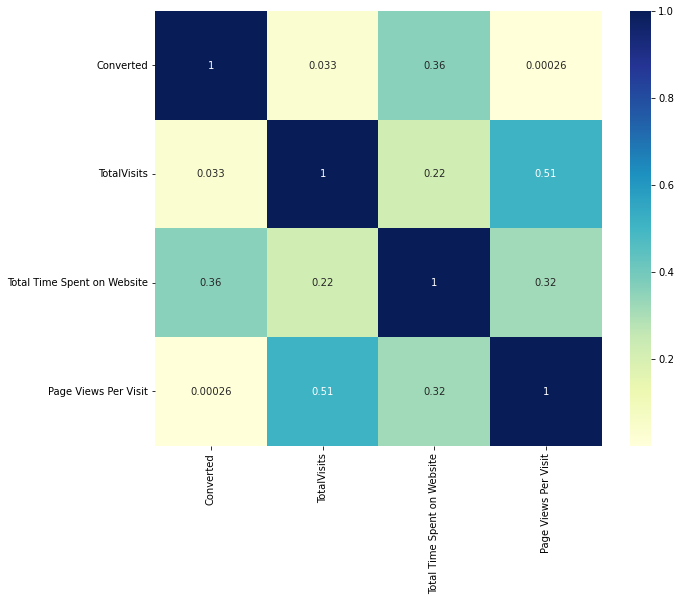

In [65]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Total Visits

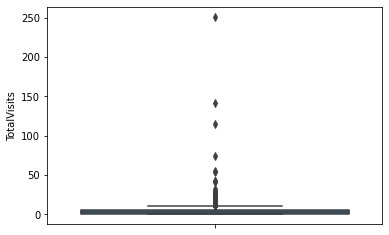

In [66]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df['TotalVisits'])
plt.show()

Presence of outliers can be seen clearly

In [67]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .50, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

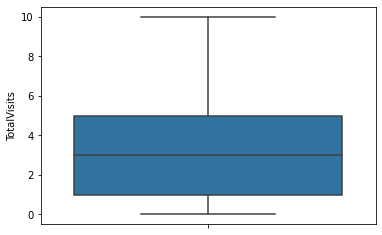

In [68]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['TotalVisits'])
plt.show()

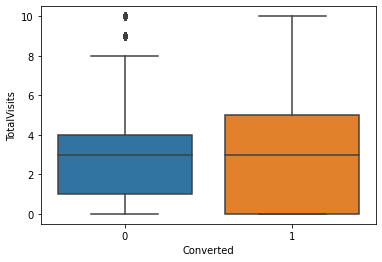

In [69]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

# Inference

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

# Total time spent on website

In [70]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .50, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

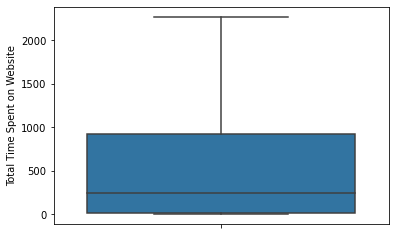

In [71]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = df['Total Time Spent on Website'])
plt.show()

Since there are no major outliers for the above variable, outlier treatment is not required for it

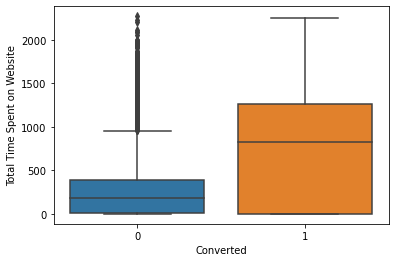

In [72]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

Inference

As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

# Page views per visit

In [73]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

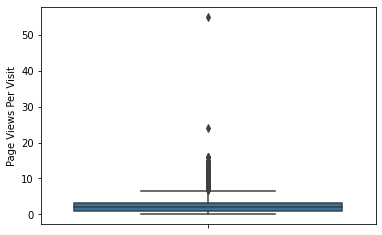

In [74]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =df['Page Views Per Visit'])
plt.show()

Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

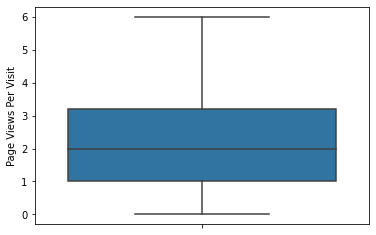

In [75]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

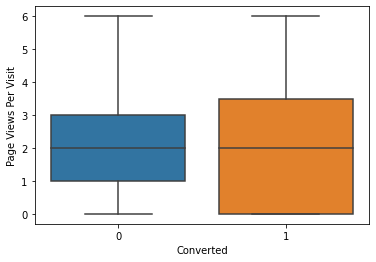

In [76]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

Inference

* Median for converted and not converted leads is almost same.
* Nothing conclusive can be said on the basis of Page Views Per Visit.

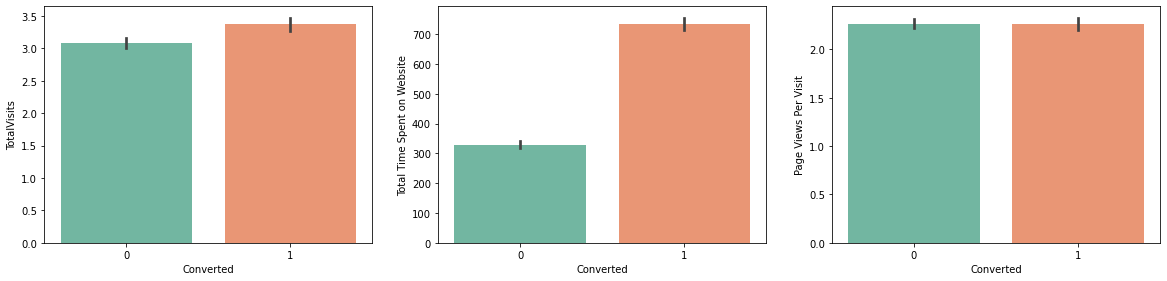

In [77]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)
plt.show()

Inference

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

# Step 4: Data Preparation

## Converting some binary variables (Yes/No) to 0/1

In [78]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [79]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   int64  
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   What is your current occupation  9074 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 638.0+ KB


## Dummy Variable Creation:

In [81]:
#getting a list of categorical columns foy creating dummy

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [82]:
import pandas as pd

dummy = pd.get_dummies(df[['Lead Origin']], drop_first=True)
df = pd.concat([df, dummy.iloc[:, 1:]], axis=1)

dummy = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
df = pd.concat([df, dummy], axis=1)

dummy = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
df = pd.concat([df, dummy], axis=1)




In [83]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [84]:
#checking dataset after dummy variable creation
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 5: Test-Train Split

In [85]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [86]:
# Putting feature variable to X
X=df.drop('Converted', axis=1)

#checking head of X
X.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [87]:
# Putting response variable to y
y = df['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


# Step 6: Feature Scaling

In [89]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [90]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,-0.292645,-0.432779,-0.160255,-0.155018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,3.417111,-0.432779,-0.540048,-0.155018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,-0.292645,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,-0.292645,-0.432779,1.643304,-0.155018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,-0.292645,0.643547,2.017593,0.122613,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
df.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student'

In [92]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.85541106458012

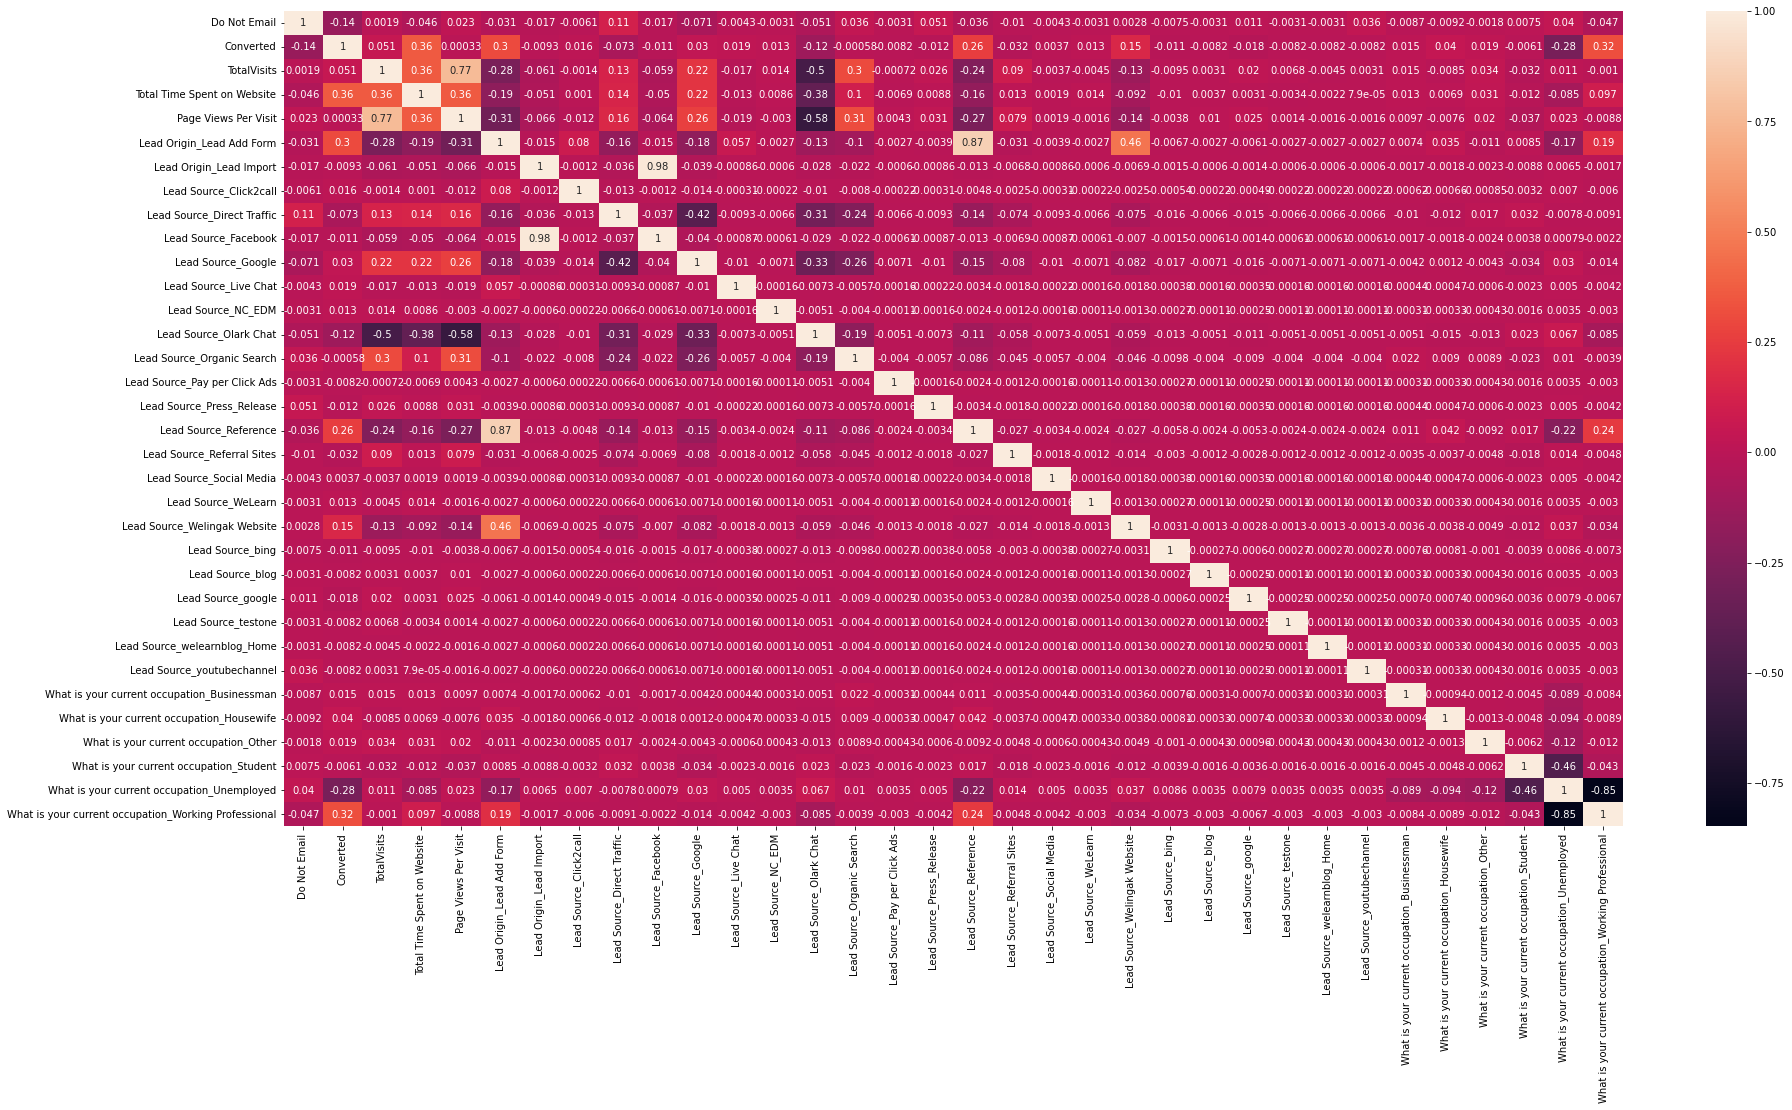

In [93]:
# Let's see the correlation matrix
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Dropping highly correlated dummy variables

In [94]:
X_test = X_test.drop(['Lead Source_Olark Chat', 'Page Views Per Visit'], axis=1)


In [95]:
X_train = X_train.drop(['Lead Source_Olark Chat', 'Page Views Per Visit'], axis=1)


In [96]:
X_test = X_test.drop(['What is your current occupation_Unemployed','What is your current occupation_Working Professional'], axis=1)


In [97]:
X_train = X_train.drop(['What is your current occupation_Unemployed','What is your current occupation_Working Professional'], axis=1)


# Step 7: Model Building using Stats Model & RFE

In [98]:
# importing necessary library
import statsmodels.api as sm

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)  # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [100]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False, False])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Click2call', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 8),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 5),
 ('Lead Source_welearnblog_Home', False, 3),
 ('Lead Source_youtubechannel', False, 10),
 ('What is your current occupation_Busi

In [102]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'What is your current occupation_Businessman',
       'What is your current occupation_Housewife'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Click2call', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'What is your current occupation_Other',
       'What is your current occupation_Student'],
      dtype='object')

# Model 1

In [104]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3176.1
Date:                Mon, 05 Jun 2023   Deviance:                       6352.3
Time:                        13:42:03   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2831
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.2226      0.075     -2.973      0.003      -0.369      -0.076
Do Not Email                                   -0.3928      0.042     -9.292      0.000      -0.476      -0.310
Total Time Spent on Website                     1.1536      0.037     31.224      0.000       1.081       1.226
Lead Origin_Lead Add Form                       1.6225      0.889      1.824      0.068      -0.121       3.366
Lead Origin_Lead Import                         0.6152      0.427      1.440      0.150      -0.222       1.453
Lead Source_Direct Traffic                     -0.9335      0.102     -9.130      0.000      -1.134      -0.733
Lead Source_Google                             -0.6354      0.096     -6.605      0.000      -0.824      -0.447
Lead Source_Organic Search                     -0.7327      0.118     -6.205      0.000      -0.964      -0.501
Lead Source_Press_Release                     -22.6261   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Reference                           2.0228      0.912      2.219      0.026       0.236       3.810
Lead Source_Referral Sites                     -1.2483      0.299     -4.174      0.000      -1.834      -0.662
Lead Source_Welingak Website                    3.5828      1.142      3.137      0.002       1.345       5.821
Lead Source_blog                              -22.8661   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                            -22.7154   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
What is your current occupation_Businessman     0.8662      1.088      0.796      0.426      -1.266       2.999
What is your current occupation_Housewife      22.3797   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
===============================================================================================================
"""

variable 'Lead Source_Press_Release has high p-value',has a very high coefficient and an extremely large standard error, resulting in an insignificant and unreliable coefficient value. so it needs to be dropped

In [105]:
#dropping column with high p-value

col = col.drop('Lead Source_Press_Release',1)

# Model 2

In [106]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3176.9
Date:                Mon, 05 Jun 2023   Deviance:                       6353.7
Time:                        13:42:03   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2830
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.2268      0.075     -3.033      0.002      -0.373      -0.080
Do Not Email                                   -0.3960      0.042     -9.369      0.000      -0.479      -0.313
Total Time Spent on Website                     1.1522      0.037     31.220      0.000       1.080       1.224
Lead Origin_Lead Add Form                       1.6248      0.889      1.827      0.068      -0.118       3.368
Lead Origin_Lead Import                         0.6172      0.427      1.445      0.149      -0.220       1.455
Lead Source_Direct Traffic                     -0.9288      0.102     -9.094      0.000      -1.129      -0.729
Lead Source_Google                             -0.6313      0.096     -6.567      0.000      -0.820      -0.443
Lead Source_Organic Search                     -0.7282      0.118     -6.171      0.000      -0.959      -0.497
Lead Source_Reference                           2.0239      0.912      2.220      0.026       0.237       3.811
Lead Source_Referral Sites                     -1.2443      0.299     -4.162      0.000      -1.830      -0.658
Lead Source_Welingak Website                    3.5858      1.142      3.140      0.002       1.348       5.824
Lead Source_blog                              -22.8624   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                            -22.7103   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
What is your current occupation_Businessman     0.8652      1.088      0.795      0.426      -1.266       2.997
What is your current occupation_Housewife      22.3779   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
===============================================================================================================
"""

variable 'Lead Source_blog' has high p-value,has a very high coefficient and an extremely large standard error, resulting in an insignificant and unreliable coefficient value. so it needs to be dropped

In [107]:
#dropping column with high p-value

col = col.drop('Lead Source_blog',1)

# MODEL 3

In [108]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3177.7
Date:                Mon, 05 Jun 2023   Deviance:                       6355.4
Time:                        13:42:03   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2828
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.2302      0.075     -3.079      0.002      -0.377      -0.084
Do Not Email                                   -0.3959      0.042     -9.367      0.000      -0.479      -0.313
Total Time Spent on Website                     1.1513      0.037     31.214      0.000       1.079       1.224
Lead Origin_Lead Add Form                       1.6275      0.889      1.830      0.067      -0.116       3.371
Lead Origin_Lead Import                         0.6198      0.427      1.451      0.147      -0.218       1.457
Lead Source_Direct Traffic                     -0.9250      0.102     -9.061      0.000      -1.125      -0.725
Lead Source_Google                             -0.6276      0.096     -6.531      0.000      -0.816      -0.439
Lead Source_Organic Search                     -0.7245      0.118     -6.141      0.000      -0.956      -0.493
Lead Source_Reference                           2.0237      0.912      2.220      0.026       0.237       3.810
Lead Source_Referral Sites                     -1.2406      0.299     -4.150      0.000      -1.826      -0.655
Lead Source_Welingak Website                    3.5855      1.142      3.140      0.002       1.347       5.824
Lead Source_google                            -22.7063   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
What is your current occupation_Businessman     0.8649      1.087      0.795      0.426      -1.266       2.996
What is your current occupation_Housewife      22.3772   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
===============================================================================================================
"""

'Lead Source_google' column has a very high coefficient and a large standard error, indicating insignificance. so it needs to be dropped

In [109]:
#dropping column with high p-value

col = col.drop('Lead Source_google',1)

# MODEL 4

In [110]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3180.9
Date:                Mon, 05 Jun 2023   Deviance:                       6361.7
Time:                        13:42:03   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2820
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.2420      0.075     -3.240      0.001      -0.388      -0.096
Do Not Email                                   -0.3962      0.042     -9.383      0.000      -0.479      -0.313
Total Time Spent on Website                     1.1476      0.037     31.185      0.000       1.075       1.220
Lead Origin_Lead Add Form                       1.6365      0.889      1.840      0.066      -0.106       3.379
Lead Origin_Lead Import                         0.6283      0.427      1.470      0.141      -0.209       1.466
Lead Source_Direct Traffic                     -0.9114      0.102     -8.941      0.000      -1.111      -0.712
Lead Source_Google                             -0.6144      0.096     -6.403      0.000      -0.803      -0.426
Lead Source_Organic Search                     -0.7112      0.118     -6.036      0.000      -0.942      -0.480
Lead Source_Reference                           2.0234      0.911      2.220      0.026       0.237       3.810
Lead Source_Referral Sites                     -1.2275      0.299     -4.110      0.000      -1.813      -0.642
Lead Source_Welingak Website                    3.5853      1.142      3.140      0.002       1.347       5.823
What is your current occupation_Businessman     0.8637      1.086      0.795      0.427      -1.266       2.993
What is your current occupation_Housewife      22.3745   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
===============================================================================================================
"""

'What is your current occupation_Housewife'column has a very high coefficient and a large standard error, indicating insignificance. so it needs to be dropped

In [111]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

# MODEL 5

In [112]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3184.4
Date:                Mon, 05 Jun 2023   Deviance:                       6368.7
Time:                        13:42:03   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2813
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.2425      0.075     -3.247      0.001      -0.389      -0.096
Do Not Email                                   -0.3970      0.042     -9.401      0.000      -0.480      -0.314
Total Time Spent on Website                     1.1471      0.037     31.197      0.000       1.075       1.219
Lead Origin_Lead Add Form                       1.6365      0.889      1.840      0.066      -0.106       3.379
Lead Origin_Lead Import                         0.6282      0.427      1.470      0.141      -0.209       1.466
Lead Source_Direct Traffic                     -0.9088      0.102     -8.919      0.000      -1.108      -0.709
Lead Source_Google                             -0.6135      0.096     -6.394      0.000      -0.802      -0.425
Lead Source_Organic Search                     -0.7025      0.118     -5.971      0.000      -0.933      -0.472
Lead Source_Reference                           2.0331      0.911      2.231      0.026       0.247       3.819
Lead Source_Referral Sites                     -1.2270      0.299     -4.109      0.000      -1.812      -0.642
Lead Source_Welingak Website                    3.5861      1.142      3.141      0.002       1.348       5.824
What is your current occupation_Businessman     0.8590      1.087      0.791      0.429      -1.271       2.989
===============================================================================================================
"""

'What is your current occupation_Businessman' column has a very high coefficient and a large standard error, indicating insignificance. so it needs to be dropped

In [113]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman' ,1)

# MODEL 6

In [114]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3184.7
Date:                Mon, 05 Jun 2023   Deviance:                       6369.4
Time:                        13:42:04   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2812
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2426      0.075     -3.249      0.001      -0.389      -0.096
Do Not Email                    -0.3972      0.042     -9.408      0.000      -0.480      -0.314
Total Time Spent on Website      1.1471      0.037     31.202      0.000       1.075       1.219
Lead Origin_Lead Add Form        1.6364      0.889      1.840      0.066      -0.106       3.379
Lead Origin_Lead Import          0.6281      0.427      1.470      0.142      -0.209       1.466
Lead Source_Direct Traffic      -0.9079      0.102     -8.913      0.000      -1.108      -0.708
Lead Source_Google              -0.6130      0.096     -6.389      0.000      -0.801      -0.425
Lead Source_Organic Search      -0.7000      0.118     -5.952      0.000      -0.931      -0.470
Lead Source_Reference            2.0350      0.911      2.233      0.026       0.249       3.821
Lead Source_Referral Sites      -1.2270      0.299     -4.109      0.000      -1.812      -0.642
Lead Source_Welingak Website     3.5863      1.142      3.141      0.002       1.348       5.824
================================================================================================
"""

'Lead Origin_Lead Import' column has a very high coefficient and a large standard error, indicating insignificance. so it needs to be dropped

In [115]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

# MODEL 7

In [116]:
#BUILDING MODEL #7

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3185.7
Date:                Mon, 05 Jun 2023   Deviance:                       6371.4
Time:                        13:42:04   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2810
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2285      0.074     -3.092      0.002      -0.373      -0.084
Do Not Email                    -0.3977      0.042     -9.420      0.000      -0.480      -0.315
Total Time Spent on Website      1.1467      0.037     31.191      0.000       1.075       1.219
Lead Origin_Lead Add Form        1.6218      0.889      1.824      0.068      -0.121       3.365
Lead Source_Direct Traffic      -0.9219      0.101     -9.102      0.000      -1.120      -0.723
Lead Source_Google              -0.6271      0.095     -6.578      0.000      -0.814      -0.440
Lead Source_Organic Search      -0.7141      0.117     -6.098      0.000      -0.944      -0.485
Lead Source_Reference            2.0351      0.911      2.233      0.026       0.249       3.821
Lead Source_Referral Sites      -1.2411      0.298     -4.159      0.000      -1.826      -0.656
Lead Source_Welingak Website     3.5867      1.142      3.141      0.002       1.349       5.825
================================================================================================
"""

'Lead Origin_Lead Add Form' column has a very high coefficient and a large standard error, indicating insignificance. so it needs to be dropped

In [117]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

# MODEL 8

In [118]:
#BUILDING MODEL #8

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3187.5
Date:                Mon, 05 Jun 2023   Deviance:                       6374.9
Time:                        13:42:04   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2806
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2182      0.074     -2.967      0.003      -0.362      -0.074
Do Not Email                    -0.3980      0.042     -9.429      0.000      -0.481      -0.315
Total Time Spent on Website      1.1472      0.037     31.214      0.000       1.075       1.219
Lead Source_Direct Traffic      -0.9324      0.101     -9.228      0.000      -1.130      -0.734
Lead Source_Google              -0.6376      0.095     -6.707      0.000      -0.824      -0.451
Lead Source_Organic Search      -0.7246      0.117     -6.199      0.000      -0.954      -0.495
Lead Source_Reference            3.6472      0.221     16.480      0.000       3.213       4.081
Lead Source_Referral Sites      -1.2516      0.298     -4.195      0.000      -1.836      -0.667
Lead Source_Welingak Website     5.1989      0.723      7.196      0.000       3.783       6.615
================================================================================================
"""

## Since the Model 8 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

### Calculating VIF

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.11
3,Lead Source_Google,1.04
2,Lead Source_Direct Traffic,1.03
5,Lead Source_Reference,1.03
0,Do Not Email,1.02
4,Lead Source_Organic Search,1.01
7,Lead Source_Welingak Website,1.01
6,Lead Source_Referral Sites,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Predicting a Train model

In [120]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.228285
1012    0.041879
9226    0.245787
4750    0.700786
7987    0.782523
1281    0.577462
2880    0.147998
4971    0.809192
7536    0.891846
1248    0.749756
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22828494, 0.04187948, 0.24578676, 0.70078599, 0.78252334,
       0.57746175, 0.14799833, 0.80919219, 0.89184643, 0.74975585])

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.228285,3009
1,0,0.041879,1012
2,0,0.245787,9226
3,1,0.700786,4750
4,1,0.782523,7987


In [123]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.228285,3009,0
1,0,0.041879,1012,0
2,0,0.245787,9226,0
3,1,0.700786,4750,1
4,1,0.782523,7987,1


## Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [124]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3422  483]
 [ 950 1496]]


In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.7743662415367658


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6116107931316435

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8763124199743918

In [129]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1236875800256082


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.7559373420919656


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.782708142726441


# PLOTTING ROC CURVE

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

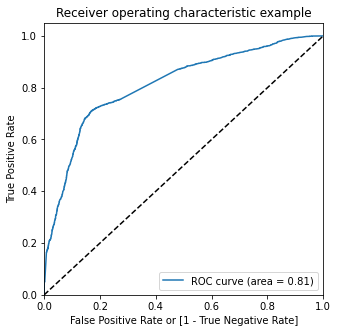

In [133]:
y_train_actual = y_train_pred_final.Converted  # Replace with your actual labels
y_train_probs = y_train_pred_final.Converted_prob  # Replace with your predicted probabilities
draw_roc(y_train_actual, y_train_probs)

The ROC Curve should be a value close to 1. We are getting a good value of 0.81 indicating a good predictive model.

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.228285,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.041879,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.245787,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.700786,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.782523,7987,1,1,1,1,1,1,1,1,1,0,0


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.439931  0.993868  0.092958
0.2   0.2  0.596599  0.903925  0.404097
0.3   0.3  0.772792  0.728128  0.800768
0.4   0.4  0.786490  0.684383  0.850448
0.5   0.5  0.774366  0.611611  0.876312
0.6   0.6  0.754212  0.513083  0.905250
0.7   0.7  0.724295  0.387572  0.935211
0.8   0.8  0.693749  0.250613  0.971319
0.9   0.9  0.673910  0.168847  0.990269


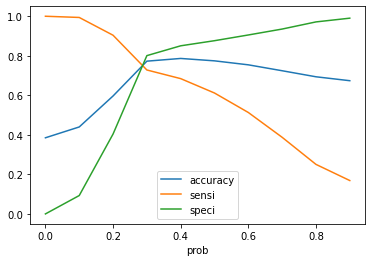

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [137]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.228285,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.041879,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.245787,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.700786,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.782523,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [138]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()


,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.228285,3009,0,23
1,0,0.041879,1012,0,4
2,0,0.245787,9226,0,25
3,1,0.700786,4750,1,70
4,1,0.782523,7987,1,78


In [139]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1781
0     665
Name: final_Predicted, dtype: int64

In [140]:
# check the precentage of final_predicted conversions

1781/float(1781+665)

0.7281275551921504

# Hence, we can see that the final prediction of conversions have a target of 72% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.7727916863486065

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3127,  778],
       [ 665, 1781]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7281275551921504

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.8007682458386683

Inference:
    
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.75, which is very good. We have the following values for the Train Data:

* Accuracy : 77.27%
* Sensitivity :72.81%
* Specificity : 80.07%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [146]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19923175416133163


In [147]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6959749902305589


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8246308016877637


## Precision and Recall

In [149]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3127,  778],
       [ 665, 1781]], dtype=int64)

In [150]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6959749902305589

In [151]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7281275551921504

In [152]:
from sklearn.metrics import precision_score, recall_score

In [153]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.6959749902305589

In [154]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.7281275551921504

### Precision and Recall Trade-off

In [155]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [156]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


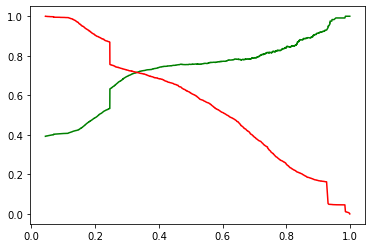

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Predictions on the test set

In [158]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student
3271,-0.292789,0.304501,-0.591008,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,-0.292789,0.666261,1.894051,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.292789,-0.419021,-0.743117,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,-0.292789,-1.142542,-0.878732,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3830,-0.292789,1.751544,-0.578179,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
3271,-0.292789,-0.591008,0,1,0,0,0,0
1490,-0.292789,1.894051,1,0,0,0,0,0
7936,-0.292789,-0.743117,0,1,0,0,0,0
4216,-0.292789,-0.878732,0,0,0,1,0,0
3830,-0.292789,-0.578179,0,0,1,0,0,0


In [160]:
X_test_sm = sm.add_constant(X_test)

In [161]:
X_test_sm.shape

(2723, 9)

In [162]:
y_test_pred = res.predict(X_test_sm)   

In [163]:
y_test_pred[:10]

3271    0.195087
1490    0.757452
7936    0.169132
4216    0.926722
3830    0.183992
1800    0.169724
6507    0.186008
4821    0.352435
4223    0.926722
4714    0.247913
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
# Let's see the head
y_pred_1.head()

,0
3271,0.195087
1490,0.757452
7936,0.169132
4216,0.926722
3830,0.183992


In [166]:
 #Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.195087
1,1,1490,0.757452
2,0,7936,0.169132
3,1,4216,0.926722
4,0,3830,0.183992


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

### Assigning Lead Score

In [172]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [173]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.195087,20
1,1490,1,0.757452,76
2,7936,0,0.169132,17
3,4216,1,0.926722,93
4,3830,0,0.183992,18


In [174]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)


In [175]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.195087,20,0
1,1490,1,0.757452,76,1
2,7936,0,0.169132,17,0
3,4216,1,0.926722,93,1
4,3830,0,0.183992,18,0


In [176]:
# checking if 72% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    708
0    281
Name: final_Predicted, dtype: int64

In [177]:
# check the precentage of final_predicted conversions on test data

708/float(708+281)

0.7158746208291203

Hence we can see that the final prediction of conversions have a target rate of 71.5% (same as predictions made on training data set)

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.7745134043334557

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1401,  333],
       [ 281,  708]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7158746208291203

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8079584775086506

## Precision and Recall metrics for the test set

In [183]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.6801152737752162

In [184]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7158746208291203

Inference:
    
After running the model on the Test Data these are the figures we obtain:

* Accuracy : 77.45%
* Sensitivity :71.58%
* Specificity : 80.79%

Conclusion:

* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are around 77%, 72% and 81% which are approximately closer to the respective values calculated using trained set.
* Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 71.5%
* Hence overall this model seems to be good.

The top three variables that contribute most towards the probability of a lead getting converted are

* Total Time Spent on Website
* Lead Source_Welingak Website
* Lead Source_Reference 

In [185]:
test=pd.read_csv("test.csv")

In [186]:
test.shape

(2007, 36)

In [187]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

test = test.replace('Select', np.nan)

In [188]:
100*test.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               80.169407
Lead Profile                                     72.645740
Lead Quality                                     50.971599
Asymmetrique Activity Index                      45.341305
Asymmetrique Profile Score                       45.341305
Asymmetrique Profile Index                       45.341305
Asymmetrique Activity Score                      45.341305
City                                             38.714499
Specialization                                   35.077230
Tags                                             35.027404
What matters most to you in choosing a course    28.799203
What is your current occupation                  28.599900
Country                                          25.909317
Page Views Per Visit                              1.195815
TotalVisits                                       1.195815
Last Activity                                     0.896861
Lead Source                                       0.5979

In [189]:
# create list of columns having unique values 1
list1=list(test.columns[test.nunique()==1])

In [190]:
# create list of columns having unique values 2
list2=list(test.columns[test.nunique()==2])

In [191]:
# Encoding the variables with yes/no labels
for feature in list2:

    test[feature] = test[feature].apply(lambda x : 1 if x=='Yes' else 0)
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,0,0,3.0,143,5.0,Email Link Clicked,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,0,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,0,0,251.0,54,2.0,Page Visited on Website,...,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,1,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,0,0,0.0,0,0.0,SMS Sent,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,0,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,0,0,16.0,485,2.0,Email Opened,...,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,0,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,0,0,4.0,1849,7.0,Olark Chat Conversation,...,No,NaN,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,0,Modified


In [192]:
# Dropping columns having more than 40% null values
test.drop(test.columns[100*test.isnull().mean()>40],axis=1,inplace=True)

In [193]:
# Dropping columns having only one unique values
test.drop(list1,axis=1,inplace=True)

In [194]:
test.drop('Prospect ID',axis=1,inplace=True)

In [195]:
100*test.isnull().mean().sort_values(ascending=False)

City                                      38.714499
Specialization                            35.077230
Tags                                      35.027404
What is your current occupation           28.599900
Country                                   25.909317
TotalVisits                                1.195815
Page Views Per Visit                       1.195815
Last Activity                              0.896861
Lead Source                                0.597907
Newspaper                                  0.000000
A free copy of Mastering The Interview     0.000000
Digital Advertisement                      0.000000
Id                                         0.000000
Search                                     0.000000
Lead Origin                                0.000000
Total Time Spent on Website                0.000000
Do Not Call                                0.000000
Do Not Email                               0.000000
Last Notable Activity                      0.000000
dtype: float

In [196]:
categorical_list=list(test.columns[(test.dtypes==object) | (test.nunique()<=3)])
categorical_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper',
 'Digital Advertisement',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [197]:
continous_list=list(test.columns[(test.dtypes!=object) & (test.nunique()>2)])
continous_list

['Id', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [198]:
for i in categorical_list :
    if 100*test[i].isnull().mean() :
        mode=test[i].mode()[0]
        test[i]=test[i].fillna(mode)

In [199]:
for i in continous_list :
    if 100* test[i].isnull().mean():
        med=test[i].median()
        test[i]=test[i].fillna(med)

In [200]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
# test.dropna(inplace=True)

In [201]:
# chekcing missing values after imputation
test.isnull().mean()*100

Id                                        0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [202]:
test.shape

(2007, 19)

In [203]:
test=test[['Id','Lead Origin','Lead Source','Do Not Email','TotalVisits','Total Time Spent on Website',
 'Page Views Per Visit','Last Activity','Specialization','What is your current occupation','Tags',
 'City','Last Notable Activity']]

In [204]:
q1 = test["TotalVisits"].quantile(0.95)
test["TotalVisits"][test["TotalVisits"] >= q1] = q1
q2 = test['Page Views Per Visit'].quantile(0.85)
test['Page Views Per Visit'][test['Page Views Per Visit'] >= q2] = q2

In [205]:
q1 = test["TotalVisits"].quantile(0.95)
test["TotalVisits"][test["TotalVisits"] >= q1] = q1
q2 = test['Page Views Per Visit'].quantile(0.85)
test['Page Views Per Visit'][test['Page Views Per Visit'] >= q2] = q2

In [206]:
test.shape

(2007, 13)

In [207]:

dummy = pd.get_dummies(test[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [208]:
test = test.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,111151,0,3.0,143,5.0
1,111152,0,10.0,54,2.0
2,111153,0,0.0,0,0.0
3,111154,0,10.0,485,2.0
4,111155,0,4.0,1849,7.0


In [209]:
test = pd.concat([test, dummy], axis=1)
test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,111151,0,3.0,143,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,111152,0,10.0,54,2.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,111153,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,111154,0,10.0,485,2.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,111155,0,4.0,1849,7.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [210]:
100*test.isnull().mean().sort_values(ascending=False)

Id                                                        0.0
Tags_In confusion whether part time or DLP                0.0
Tags_Want to take admission but has financial problems    0.0
Tags_Still Thinking                                       0.0
Tags_Ringing                                              0.0
                                                         ... 
Last Activity_Unreachable                                 0.0
Last Activity_SMS Sent                                    0.0
Last Activity_Page Visited on Website                     0.0
Last Activity_Olark Chat Conversation                     0.0
Last Notable Activity_View in browser link Clicked        0.0
Length: 93, dtype: float64

In [211]:
test[col].shape

(2007, 8)

In [212]:
scaler = StandardScaler()

test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,111151,0,-0.082761,-0.672339,0.617561,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,111152,0,2.417685,-0.817420,-0.573831,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,111153,0,-1.154381,-0.905446,-1.368092,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,111154,0,2.417685,-0.114838,-0.573831,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,111155,0,0.274446,2.108646,1.411822,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [213]:
test.set_index("Id",inplace=True)

In [214]:
test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Id,,,,,,,,,,,,,,,,,,,,,
111151,0,-0.082761,-0.672339,0.617561,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111152,0,2.417685,-0.817420,-0.573831,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111153,0,-1.154381,-0.905446,-1.368092,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
111154,0,2.417685,-0.114838,-0.573831,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111155,0,0.274446,2.108646,1.411822,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113153,1,1.346066,-0.535409,1.014692,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113154,0,-0.082761,-0.282740,0.617561,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
113155,0,-0.439967,0.890946,-0.176700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [215]:
test[col]

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
Id,,,,,,,,
111151,0,-0.672339,1,0,0,0,0,0
111152,0,-0.817420,1,0,0,0,0,0
111153,0,-0.905446,0,0,0,0,0,0
111154,0,-0.114838,0,1,0,0,0,0
111155,0,2.108646,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
113153,1,-0.535409,0,0,1,0,0,0
113154,0,-0.282740,0,1,0,0,0,0
113155,0,0.890946,0,1,0,0,0,0


In [216]:
y_test=y_test.head(2007)

In [217]:
y_test=y_test.sample(n=2007,random_state=42)

In [218]:
X_test_sm = sm.add_constant(test[col])
y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Id':test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
y_test_pred_final.reset_index(inplace=True, drop=True)
print("------------------Result of test data-------------------")
print(y_test_pred_final.head())
    
print("------------------Model Evaluation Metrics-------------------")


------------------Result of test data-------------------
       Id  Converted  Convert_Probability  Convert_predicted  Lead_Score
0  111151          1             0.127643                  0          13
1  111152          1             0.110230                  0          11
2  111153          0             0.221499                  0          22
3  111154          1             0.271396                  1          27
4  111155          0             0.826820                  1          83
------------------Model Evaluation Metrics-------------------


In [219]:
y_test_pred_final

,Id,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,111151,1,0.127643,0,13
1,111152,1,0.110230,0,11
2,111153,0,0.221499,0,22
3,111154,1,0.271396,1,27
4,111155,0,0.826820,1,83
...,...,...,...,...,...
2002,113153,1,0.124011,0,12
2003,113154,0,0.235022,0,24
2004,113155,0,0.541479,1,54
2005,113156,0,0.221499,0,22


In [220]:
y_test_pred_final["Convert_predicted"].value_counts()

0    1177
1     830
Name: Convert_predicted, dtype: int64

In [221]:
test_data=y_test_pred_final[["Id","Convert_predicted"]]

In [222]:
test_data["Converted"]=y_test_pred_final["Convert_predicted"]

In [223]:
y_test.shape

(2007,)

In [224]:
test_data["Converted"].value_counts()

0    1177
1     830
Name: Converted, dtype: int64

In [225]:
test_data.to_csv("test_data4.csv",index=False)